### Import your librares

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load your dataset

In [25]:
df = pd.read_csv("seattle_weather.csv")
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


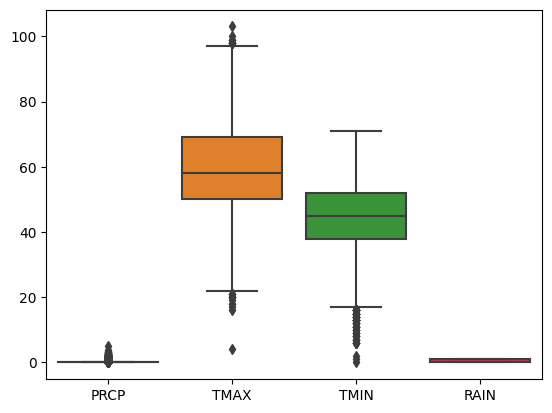

In [22]:
sns.boxplot(df)
plt.show()

In [62]:
col = df.select_dtypes(include=[np.number])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1

outlier = 1.5 

lower = Q1 - outlier * IQR
upper = Q3 + outlier * IQR

df_outlier = pd.DataFrame({'Lower Limit': lower, 'Upper Limit': upper})

print("Lower and Upper Limits for Outliers:")
df_outlier

Lower and Upper Limits for Outliers:


,Lower Limit,Upper Limit
PRCP,-0.15,0.25
TMAX,21.50,97.50
TMIN,17.00,73.00


In [77]:
#another one 
outlier_threshold = 1.5  
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - outlier_threshold * IQR
upper_limit = Q3 + outlier_threshold * IQR

outliers = df[((df < lower_limit) | (df > upper_limit)).any(axis=1)]
df_clean = df[~((df < lower_limit) | (df > upper_limit)).any(axis=1)]


print("Number of outliers:", len(outliers))
print("Number of data points after removing outliers:", len(df_clean))

Number of outliers: 3658
Number of data points after removing outliers: 21893


In [69]:
df["DATE"] = pd.to_datetime(df["DATE"])

outlier_days = 30  
lower_limit = df["DATE"].min() - pd.Timedelta(days=outlier_days)
upper_limit = df["DATE"].max() + pd.Timedelta(days=outlier_days)

outliers = df[(df["DATE"] < lower_limit) | (df["DATE"] > upper_limit)]
df_clean = df[~((df["DATE"] < lower_limit) | (df["DATE"] > upper_limit))]

print("Number of outliers:", len(outliers))
print("Number of data points after removing outliers:", len(df_clean))

Number of outliers: 0
Number of data points after removing outliers: 25551


In [84]:
#another way

lower_limit= float('-inf')
upper_limit= float('-inf')
outliers = df[(df["PRCP"] < lower_limit) | (df["PRCP"] > upper_limit)]
df_clean = df[~((df["PRCP"] < lower_limit) | (df["PRCP"] > upper_limit))]

print("Number of outliers:", len(outliers))
print("Number of data points after removing outliers:", len(df_clean))


Number of outliers: 25548
Number of data points after removing outliers: 3


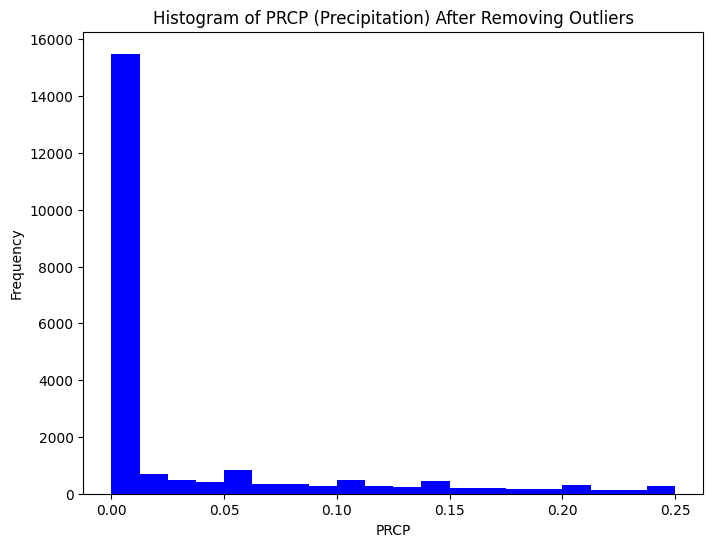

In [76]:

plt.figure(figsize=(8, 6))
plt.hist(df_clean["PRCP"], bins=20, color='blue')
plt.title("(Precipitation) After Removing Outliers")
plt.xlabel("PRCP")
plt.ylabel("Frequency")
plt.show()

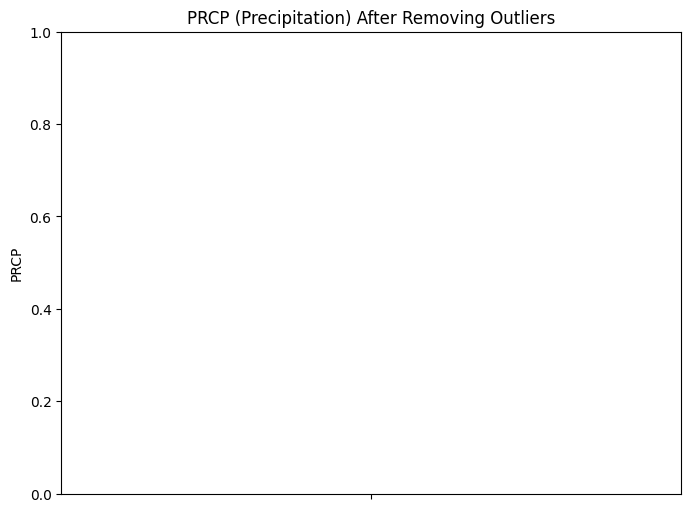

In [112]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, y="PRCP", color='blue')
plt.title("PRCP (Precipitation) After Removing Outliers")
plt.ylabel("PRCP")
plt.show()

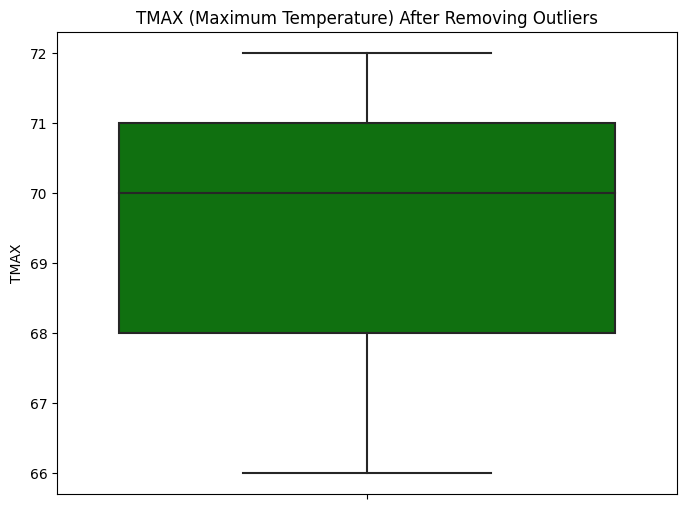

In [109]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, y="TMAX", color='green')
plt.title("TMAX (Maximum Temperature) After Removing Outliers")
plt.ylabel("TMAX")
plt.show()


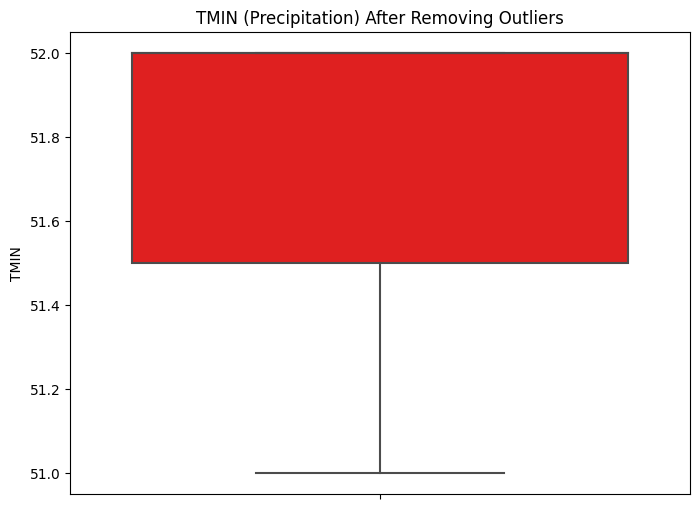

In [110]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, y="TMIN", color='red')
plt.title("TMIN (Precipitation) After Removing Outliers")
plt.ylabel("TMIN")
plt.show()